# Topic 2 - Gradient Descent

To begin exploring regression analysis we are going to consider a core concept in machine learning; gradient descent, in which an algorithm attempts to recursively improve on its predictions.

In [1]:
# Typical Import Statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['classic'])
%matplotlib inline

## Simulating Some Rainfall and Humidity Data

The following code generates our data points and plots them to show the relationship.

We're going to simply make 10 numbers between 0 and 1 for humidity and for rainfall 10 numbers which are slightly more, using the numpy random.rand() function, which takes a number (x) as an argument and returns an array of length (x) in which each element of the array is a number between 0 and 1.

We are also going to use the matplotlib plt function, which is flexible to many inputs but in our case is taking three arguments: our simulated humidity data, our simulated rainfall data and 'b.' to denote the colour blue should be used in plotting. We also use plt.xlabel and plt.ylabel to label our axes.

humidity values -
 [0.60726451 0.73486183 0.20006468 0.5289698  0.10836253 0.19206835
 0.36874293 0.26476195 0.13811278 0.81178069]
rainfall values -
 [3.14689084 3.86986162 0.7228138  2.89329577 2.0172859  0.77031791
 1.96296207 2.70448791 1.29378589 4.85254931]


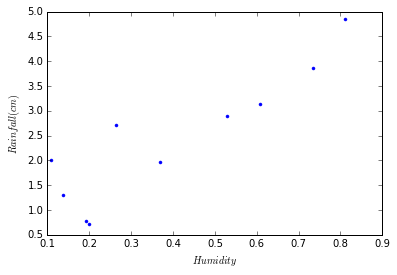

In [2]:
humidity = np.random.rand(10)

print('humidity values -\n', humidity)

rainfall = 1 + 4 * humidity+np.random.randn(10)

print('rainfall values -\n',rainfall)

#This code makes the plot
plt.figure()
plt.plot(humidity,rainfall,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Rainfall (cm)$")

## Adding Our Model

Let's have a go at putting a line on that describes this data. We're going to do a simple line from the _origin_ (x=0,y=0), sloping up through the data. To do this we use the same plt.plot command as before, but this time adding in two coordinates as a numpy array. Matplotlib recognises this as a line and plots accordingly.

The line is defined as moving between 0 and 1 in the x axis : 0 and _gradient_ in the y axis.

To begin with we set our gradient parameter as 12.

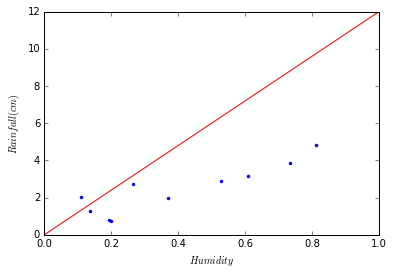

In [3]:
plt.figure()
plt.plot(humidity,rainfall,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Rainfall (cm)$")

# In our first line, every 1 step in the x axis means 12 cm of rainfall
gradient = 12

line_y_coord = np.array([[0],[gradient]])
line_x_coord = np.array([[0],[1]])
plt.plot(line_x_coord, line_y_coord, 'r-')

## :-/

This doesn't look like a fantastic model does it. The line looks too high for the data! Using the line as reference, a humidity of 0.8 would be associated with ~9cm of rain, which is not reflective of our datapoints.

The piece of code below calculates the difference in rainfall between each point and its respective prediction in our model.

The interesting thing here is the lambda function, which takes an input x and figures out the corresponding point on the line. By subtracting this value from the real rainfall figure, we can find our errors.

In [4]:
rainfall_errors = rainfall-list(map(lambda x: gradient*x,humidity))

print(rainfall_errors)

[-4.14028323 -4.94848031 -1.67796236 -3.45434183  0.71693557 -1.53450225
 -2.4619531  -0.4726555  -0.36356747 -4.88881891]


## Root Mean Squared Error

Clearly we have a problem above with our predictions above and we need some way of summarising how bad the problem is. 

Root Mean Squared Error is a metric that allows us to summarise the performance of a regression model.

What the equation below says is.

1. Work out the errors by subtracting the predicted value from the true value. (Error)
2. Square the errors to remove negative values (Squared)
3. Add all these resultant values together and divide by the count (Mean)
4. Square Root the value to make it comparable to our original values (Root)

<b>Root Mean Squared Error</b>
\begin{equation}
RMSE = (1/m \sum_{i=1}^{m} (Truth - Prediction)^{2})^{1/2} 
\end{equation}

In [5]:
np.sqrt(np.mean(np.square(rainfall_errors)))

2.9927158141890113

Perhaps we can improve on this metric with a different line. Let's have another go. This time we are adjusting our gradient parameter to 8.

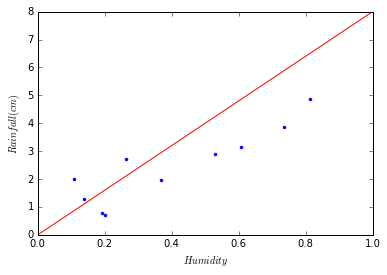

In [6]:
plt.figure()
plt.plot(humidity,rainfall,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Rainfall (cm)$")

gradient = 8

line_y_coord = np.array([[0],[gradient]])
line_x_coord = np.array([[0],[1]])
plt.plot(line_x_coord, line_y_coord, 'r-')

In [7]:
rainfall_errors = rainfall-list(map(lambda x: gradient*x,humidity))

print(rainfall_errors)

[-1.71122521 -2.009033   -0.87770364 -1.33846263  1.15038568 -0.76622887
 -0.98698137  0.5863923   0.18888365 -1.64169617]


In [8]:
np.sqrt(np.mean(np.square(rainfall_errors)))

1.2444145847444357

This is a great improvement! But just looking at it we can see that we could probably do better.

Clearly as we change our gradient parameter we affect the overall performance of the model.

So far doing this manually we have improved things, but we man write an algorithm to perform these adjustments for us.

## Gradient Descent - Now we're Machine Learning!

Gradient descent refers to an algorithm that attempts to minimize some kind of loss function. In our case, the Root Mean Squared Error. 

The first thing to do is to write a function that, per iteration of the algorithm, tells us how accurate our model is.

In [9]:
def loss_this_iteration(gradient):

    #figure out predictions by finding the rainfall point for a given humidity on our red line
    predictions = np.stack(list(map(lambda x: gradient*x,humidity))).squeeze(axis=1)

    #work out the errors in these predictions
    rainfall_errors = rainfall - predictions

    #calculate RMSE
    loss = np.sqrt(np.mean(np.square(rainfall_errors)))

    return predictions, rainfall_errors, loss

This function takes a line gradient (slope) as an input, figures out what the predictions are for each humidity point, the errors of these predictions and then an overall error metric called the _loss_.

We've seen that we can check the accuracy of a model by comparing its predictions to the actual data.

We know that at some point, the line is the most accurate we can make it. The trick is to write an algorithm that adjusts the gradient by some amount, based on how inaccurate it is.

In [10]:
def gradient_descent(humidity,rainfall,start_gradient,learning_rate=0.01,iterations=100):

    #initialise our history, which will allow us to look back at the history of the process
    loss_history = np.zeros(iterations)
    gradient_history = np.zeros(iterations)
    
    #use our function from the previous chunk
    predictions, rainfall_errors, loss = loss_this_iteration(start_gradient)
    
    #figure out how much we need to change the gradient next iteration
    #n.b this is known as the 'partial derivative' in pure mathematics
    gradient_change = -(2/len(humidity)) * sum(humidity * (rainfall_errors))

    #change the gradient by some factor called the 'learning rate'
    gradient = start_gradient - learning_rate * gradient_change
        
    #loop through the number of iterations, updating our line
    for it in range(iterations):
                
        _, rainfall_errors, loss = loss_this_iteration(gradient)
        loss_history[it]  = loss
        
        gradient_change = -(2/len(humidity)) * sum(humidity * rainfall_errors)

        gradient = gradient - learning_rate * gradient_change
        
        gradient_history[it] = gradient
        
    return gradient, gradient_history, loss_history


We start with our original gradient from the first chart we made. Using a learning rate of 0.01 and running 2000 iterations.

In [11]:
start_gradient = np.array([12])

gradient, gradient_history, loss_history = gradient_descent(humidity,rainfall,start_gradient,learning_rate=0.01,iterations=2000)

print('First Gradient: ' + str(gradient_history[0]))
print('Final Gradient: ' + str(gradient_history[-1]))
print('First MSE/Loss: ' + str(loss_history[0]))
print('Final MSE/Loss: ' + str(loss_history[-1]))

First Gradient: 11.945787383476867
Final Gradient: 5.716933103352685
First MSE/Loss: 2.980388162132516
Final MSE/Loss: 0.648766774160809


Looks like our gradient has indeed descended. In the process we have reduced Mean Squared Error significantly also. Fantastic!

## Making a Graph of our Gradient Descent

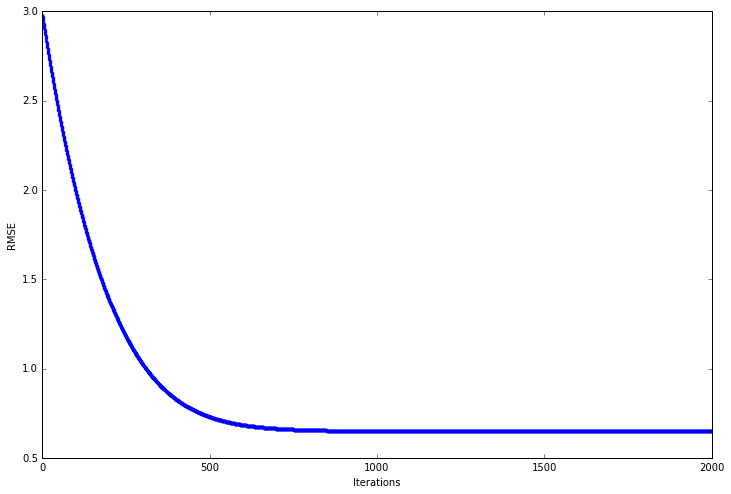

In [12]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('RMSE')
ax.set_xlabel('Iterations')
_=ax.plot(range(2000),loss_history,'b.')

It's interesting to note that at first the descent is faster, later on it's much more difficult to make improvements. Eventually we reach a point called _convergence_, at which point the line does not change as the model is as accurate as it can be without changing other aspects of it.

## Let's watch it this time, starting with a gradient of 1

The following function makes a plot for every iteration of the gradient descent algorithm. It's worth noting that the _descent_ part of gradient descent refers to the error, rather than the actual line. In the following instance with the gradient starting at 1, the gradient actually increases to fit the data better.

In [13]:
def plot_GD_base(n_iter,lr):

    var = np.array([1])
    cost_history = np.zeros(n_iter)

    for i in range(n_iter):
        pred_prev = np.stack(list(map(lambda x: var*x,humidity))).squeeze(axis=1)
        var,h,_ = gradient_descent(humidity,rainfall,var,lr,1)
        pred = np.stack(list(map(lambda x: var*x,humidity))).squeeze(axis=1)
        cost_history[i] = h[0]
        plt.figure()
        plt.plot(humidity,rainfall,'b.')
        plt.plot(humidity,pred,'r-')
        plt.xlabel("$Humidity$")
        plt.ylabel("$Rainfall (cm)$")

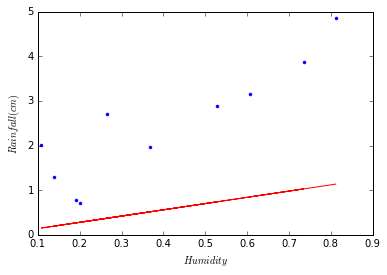

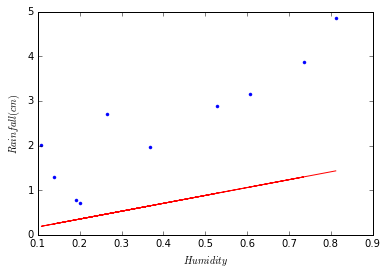

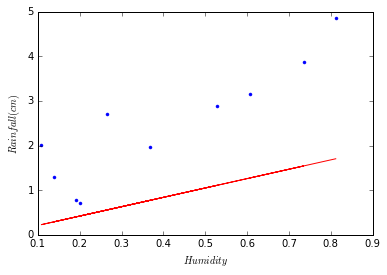

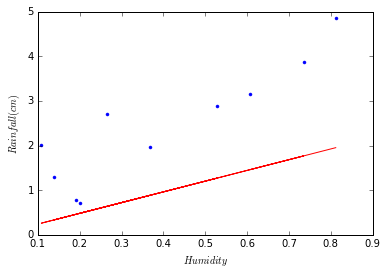

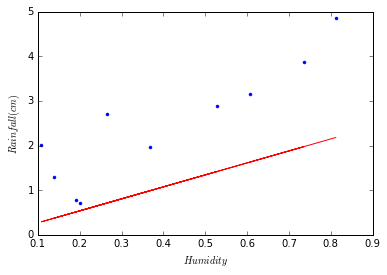

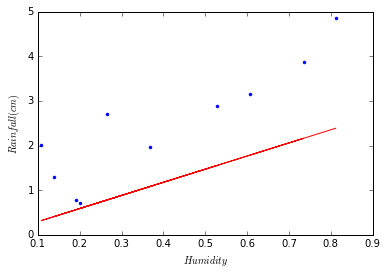

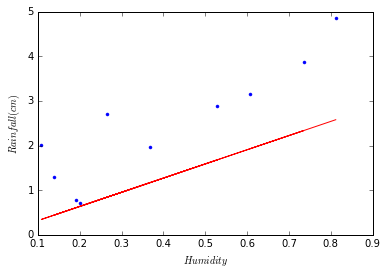

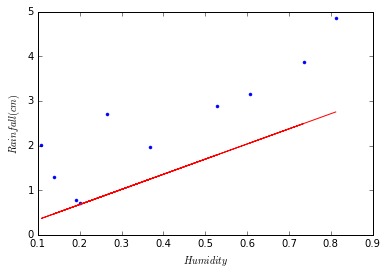

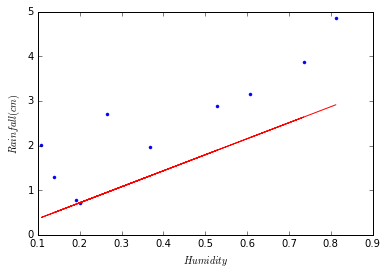

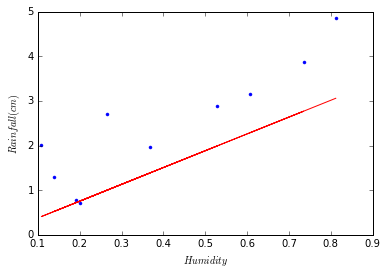

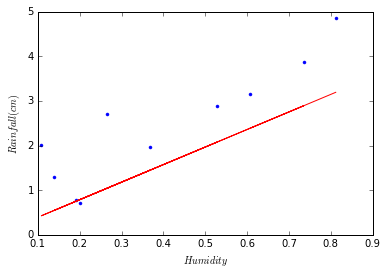

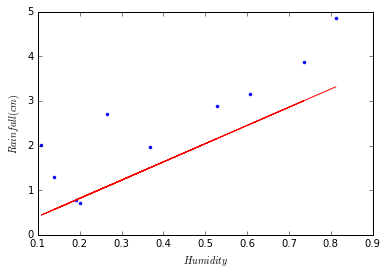

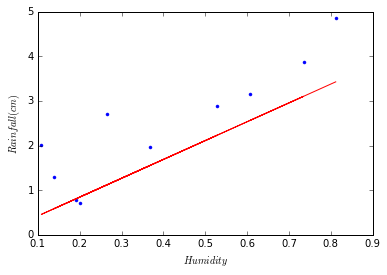

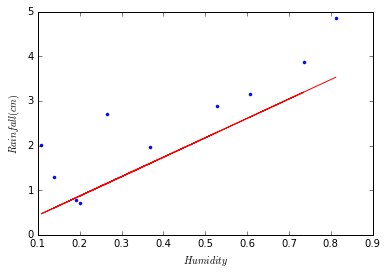

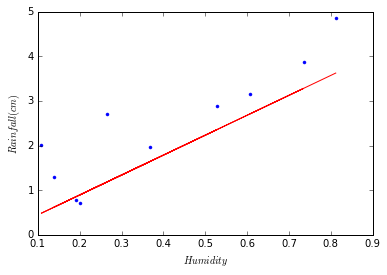

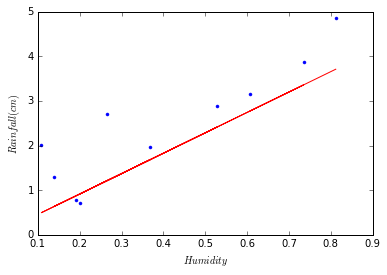

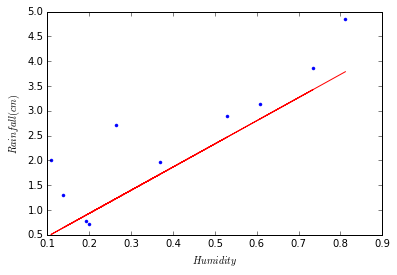

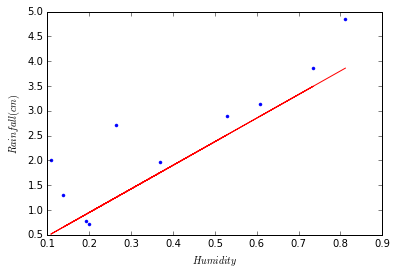

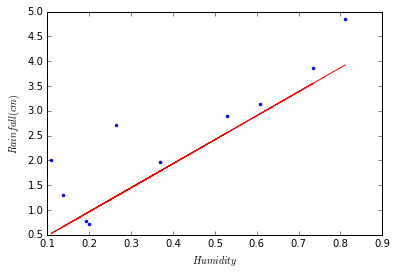

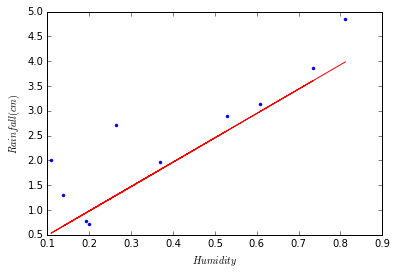

In [14]:
#Note how the gradient of the line increases
plot_GD_base(20,0.1)

# Other Considerations for Gradient Descent

### Stochastic gradient Descent

With many dimensions in real world problems, gradient descent quickly becomes compuationally expensive and slow. A further concern is that, in some instances we might think we've finished gradient descent, when in fact we have found a _local minimum_ - a point that _looks_ like the bottom of the gradient descent but actually is not. Data Scientists have looked at this problem in great deal and found other techniques such as _stochastic_ gradient descent. In which random subsets of data are used for the task. 

### Solving the System vs Gradient Descent

It is worth adding that there is a further approach to regression that involves solving the entire system of inputs to find an optimal in a single calculation. However this becomes impractical in large datasets with many inputs. The majority of contemporary machine learning algorithms will rely on some variety of gradient descent.

# Gradient Descent - Activity

1. Perform Gradient Descent on the following much larger dataset, using an initial gradient of 15, a learning rate of 0.1 and 1000 iterations. 

2. Find the Final gradient and RMSE

3. Provide a gradient descent curve of the kind found in 'Making a Graph of our Gradient Descent'

humidity values -
 [3.12747941e-02 9.61067574e-01 8.85582718e-01 4.26342023e-01
 2.16905759e-01 7.03322441e-01 6.03840632e-01 4.39673573e-01
 3.35235491e-01 1.38430706e-01 3.45285969e-01 8.95084448e-01
 5.98134035e-01 7.44615219e-01 5.89125325e-01 3.22381565e-01
 2.57293408e-01 7.76046576e-02 4.27252436e-01 7.77595587e-02
 9.85378457e-01 3.29505422e-01 4.97913649e-01 7.38514062e-01
 8.91239880e-01 4.29280048e-01 9.62844665e-01 3.36757141e-01
 2.85116330e-01 8.57478118e-01 8.23968898e-01 1.02235717e-01
 5.72923531e-01 5.00257314e-01 3.70490273e-01 3.21036207e-01
 3.13810924e-01 7.53106023e-01 4.13969760e-01 4.55643844e-01
 3.99267450e-01 1.97169202e-01 3.20905373e-01 8.32893112e-02
 3.22661736e-01 6.73756098e-02 7.37842189e-01 5.54252230e-01
 4.47595696e-02 9.89003159e-01 1.45728890e-01 2.82723316e-02
 2.46306482e-01 6.27928256e-01 7.47554034e-01 7.31984399e-01
 6.19756991e-01 2.94693538e-01 4.98582356e-01 6.58411611e-01
 7.12781365e-01 6.08507625e-01 6.40043105e-01 2.93271288e-01
 4.36

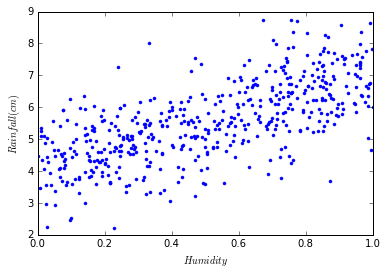

In [15]:
#Perform Gradient Descent on the following dataset

humidity = np.random.rand(500)

print('humidity values -\n', humidity)

rainfall = 4 + 3 * humidity+np.random.randn(500)

print('rainfall values -\n',rainfall)

plt.figure()
plt.plot(humidity,rainfall,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Rainfall (cm)$")

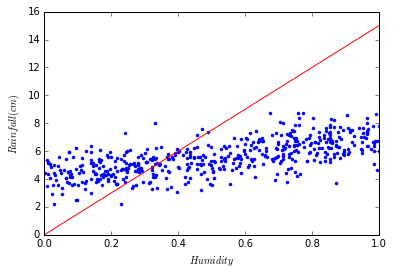

In [16]:
gradient = 15

plt.figure()
plt.plot(humidity,rainfall,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Rainfall (cm)$")

line_y_coord = np.array([[0],[gradient]])
line_x_coord = np.array([[0],[1]])
plt.plot(line_x_coord, line_y_coord, 'r-')

### INSTRUCTORS ONLY - SOLUTION

First Gradient: 14.917382349140595
Final Gradient: 8.950602896785986
First MSE/Loss: 4.152258064052585
Final MSE/Loss: 2.2079025330718913


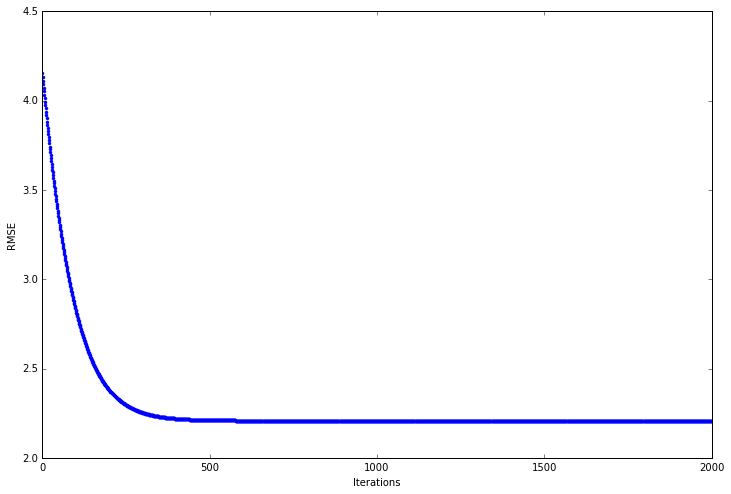

In [17]:
def loss_this_iteration(gradient):

    #figure out predictions by finding the rainfall point for a given humidity on our red line
    predictions = np.stack(list(map(lambda x: gradient*x,humidity))).squeeze(axis=1)

    #work out the errors in these predictions
    rainfall_errors = rainfall - predictions

    #calculate RMSE
    loss = np.sqrt(np.mean(np.square(rainfall_errors)))

    return predictions, rainfall_errors, loss

def gradient_descent(humidity,rainfall,start_gradient,learning_rate=0.01,iterations=100):

    #initialise our history, which will allow us to look back at the history of the process
    loss_history = np.zeros(iterations)
    gradient_history = np.zeros(iterations)
    
    #use our function from the previous chunk
    predictions, rainfall_errors, loss = loss_this_iteration(start_gradient)
    
    #figure out how much we need to change the gradient next iteration
    #n.b this is known as the 'partial derivative' in pure mathematics
    gradient_change = -(2/len(humidity)) * sum(humidity * (rainfall_errors))

    #change the gradient by some factor called the 'learning rate'
    gradient = start_gradient - learning_rate * gradient_change
        
    #loop through the number of iterations, updating our line
    for it in range(iterations):
                
        _, rainfall_errors, loss = loss_this_iteration(gradient)
        loss_history[it]  = loss
        
        gradient_change = -(2/len(humidity)) * sum(humidity * rainfall_errors)

        gradient = gradient - learning_rate * gradient_change
        
        gradient_history[it] = gradient
        
    return gradient, gradient_history, loss_history

start_gradient = np.array([15])

gradient, gradient_history, loss_history = gradient_descent(humidity,rainfall,start_gradient,learning_rate=0.01,iterations=2000)

print('First Gradient: ' + str(gradient_history[0]))
print('Final Gradient: ' + str(gradient_history[-1]))
print('First MSE/Loss: ' + str(loss_history[0]))
print('Final MSE/Loss: ' + str(loss_history[-1]))

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('RMSE')
ax.set_xlabel('Iterations')
_=ax.plot(range(2000),loss_history,'b.')

# Topic 3 - Regression Analysis with Scitkit Learn

Now to look at some real weather data and perform some real regression analysis. The following dataset contains 96453 rows of weather observations including information on humidity, temperature and a description of precipitation and cloud cover. Since we don't have a continuous metric for rainfall, we will instead be modelling Apparent Temperature (C). The first step is to examine our data and think intuitively about which features will be useful in predicting Apparent Temperature.

## Scikit Learn Basics and Building a Simple Model

In [18]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv('weather.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Looking at the dataframe we can see a variety of data both numerical and catagorical. Humidity is likely to have an effect on temperature, so we reduce our dataframe to a more simple version with just these two data types using the .iloc() method of the dataframe, and giving a row reference : (which is a wildcard meaning all rows) and selecting columns [4,5] that contain our data of interest.

In [20]:
reg_df = df.iloc[:,[4,5]]

reg_df.head()

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


Let's start by examining this relationship. We transform to numpy arrays for plotting using the .values attribute of the dataframe, and plot in the same way as in previous exercises.

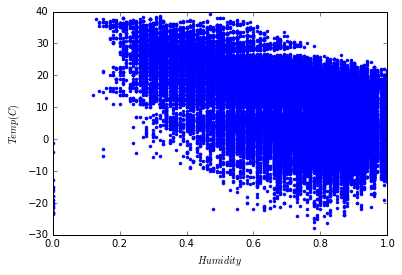

In [21]:
#Our second column contains the humidity data, which is our feature
x = reg_df.iloc[:,1].values

#Our first column contains our label
y = reg_df.iloc[:,0].values

plt.figure()
plt.plot(x,y,'b.')
plt.xlabel("$Humidity$")
plt.ylabel("$Temp (C)$")
plt.show()

Now, this data is looking rather cluttered. Points are layered on top of one and other and it's hard to tell where the bulk of them are. To get around this we can use a heatmap, which expresses density of points as different colours.

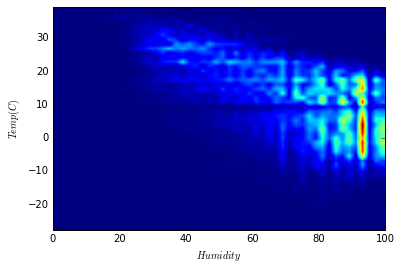

In [22]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1]*100, yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel("$Humidity$")
plt.ylabel("$Temp (C)$")
plt.show()

That's a much clearer picture. As humidity increases, temperature will generally decrease. Now we can quantify this with a regression model.

### The Scikit Learn Model

Scikit learn works with model _instances_. We make a linear regression model by calling the .LinearRegression() method of our linear_model object we imported earlier, and saving this to model.

Having done this, we can call _fit_.
### Calling _fit()_ on the model

_fit_ works by taking an input x and y.

The x input should be a numpy matrix of features, in this case just one feature.

The input y should be a numpy vector of labels that correspond to the features in x.

n.b we call reshape(-1,1) on the x in this one dimensional instance because the matrix has to take a certain shape.

In [23]:
model = linear_model.LinearRegression()

reg = model.fit(X=x.reshape(-1,1),y=y)

### Making Predictions with the Model

Having called _fit()_ on the model, we are ready to get predictions. We do this by passing in a matrix of values to be used in predictions, in our case just the same training data again.

In [24]:
predictions = reg.predict(x.reshape(-1,1))

Now we can replot our heatmap with our new regression line.

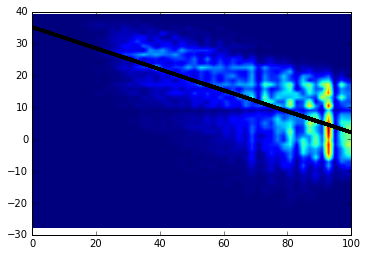

In [25]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1]*100, yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.plot(x*100, predictions, color='black', linewidth=3)
plt.show()

This looks like a convincing model!

Now we check the coefficients of each feature and the RMSE.

In [26]:
print('Coefficients: \n',reg_df.iloc[:,1:].columns, reg.coef_/100)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

Coefficients: 
 Index(['Humidity'], dtype='object') [-0.3297447]
Mean squared error: 72.88


For each percentage increase in humidity, the model predicts a 0.33 drop in degrees C. The model also has a MSE of 72.88.

Perhaps adding in Visibility might improve the model?

In [27]:
reg_df2 = df.iloc[:,[4,5,8]]

x = reg_df2.iloc[:,1:].values

y = reg_df2.iloc[:,0].values

n.b because x now has more than one feature, we no longer need to call reshape when we predict.

In [28]:
reg = linear_model.LinearRegression().fit(X=x,y=y)

predictions = reg.predict(x)

In [29]:
print('Coefficients: \n', reg_df2.iloc[:,1:].columns, reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

Coefficients: 
 Index(['Humidity', 'Visibility (km)'], dtype='object') [-29.24924285   0.47051729]
Mean squared error: 69.52


Including data for visibility has improved our model. For each km greater visibility the temperature is predicted to by 0.47 degrees c higher. 

Finally let's include whether the precipitation was snow or rain. This is a special type of feature called a 'dummy variable'. This means it can either take a value of 1 or 0. In our instance we want the feature to register as 1 if the precipitation was snow and 0 if it was rain.

### Pandas 'get_dummies()' method

This takes a column with a categorical variable and recodes it into n-1 columns, where n is the number of different possible values in the column. Since we only have 2 possible values, this method just makes one row.

We repeat the same regression process as before, using a new feature for snow.

In [30]:
reg_df3 = df.iloc[:,[4,2,5,8]]

In [31]:
dummies = pd.get_dummies(reg_df3['Precip Type'], drop_first=True)

reg_df3 = reg_df3.join(dummies).drop(['Precip Type'], axis=1)

reg_df3.head()

,Apparent Temperature (C),Humidity,Visibility (km),snow
0,7.388889,0.89,15.8263,0
1,7.227778,0.86,15.8263,0
2,9.377778,0.89,14.9569,0
3,5.944444,0.83,15.8263,0
4,6.977778,0.83,15.8263,0


In [32]:
x = reg_df3.iloc[:,1:].values

y = reg_df3.iloc[:,0].values

In [33]:
reg = linear_model.LinearRegression().fit(X=x,y=y)

predictions = reg.predict(x)

In [34]:
print('Coefficients: \n', reg_df3.iloc[:,1:].columns, reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

Coefficients: 
 Index(['Humidity', 'Visibility (km)', 'snow'], dtype='object') [-26.05311236   0.18016205 -14.72771303]
Mean squared error: 50.53


This snow feature is highly predictive, it is associated on average with a 14.7 degree C decrease in the temperature.

Congratulations, you have built a regression model using scikit learn and improved significantly on the predictive power by adding in new features.

# Regression Analysis - Activity

1. Perform regression analysis on the following dataset taken from passengers on the titanic. Initially you are to use age to predict the cost of a ticket. How effective is this model?

2. Make a new model with features from Pclass using 'get dummies' and report the new rmse error. Have you improved on your original model?

### INSTRUCTORS ONLY - SOLUTION

In [35]:
df = pd.read_csv('titanic.csv', index_col=False)
df

,Unnamed: 0,Cabin,Embarked,Fare,Pclass,Ticket,Age,Name,Parch,Sex,SibSp,Survived
0,0,NaN,S,7.2500,3,A/5 21171,22.0,"Braund, Mr. Owen Harris",0,male,1,0.0
1,1,C85,C,71.2833,1,PC 17599,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,1,1.0
2,2,NaN,S,7.9250,3,STON/O2. 3101282,26.0,"Heikkinen, Miss. Laina",0,female,0,1.0
3,3,C123,S,53.1000,1,113803,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,1,1.0
4,4,NaN,S,8.0500,3,373450,35.0,"Allen, Mr. William Henry",0,male,0,0.0
5,5,NaN,Q,8.4583,3,330877,NaN,"Moran, Mr. James",0,male,0,0.0
6,6,E46,S,51.8625,1,17463,54.0,"McCarthy, Mr. Timothy J",0,male,0,0.0
7,7,NaN,S,21.0750,3,349909,2.0,"Palsson, Master. Gosta Leonard",1,male,3,0.0
8,8,NaN,S,11.1333,3,347742,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,female,0,1.0
9,9,NaN,C,30.0708,2,237736,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0,female,1,1.0


In [37]:
titanic_1 = df.iloc[:,[3,6]].dropna()

print(titanic_1.head())

x = titanic_1.iloc[:,1:].values

y = titanic_1.iloc[:,0].values

      Fare   Age
0   7.2500  22.0
1  71.2833  38.0
2   7.9250  26.0
3  53.1000  35.0
4   8.0500  35.0


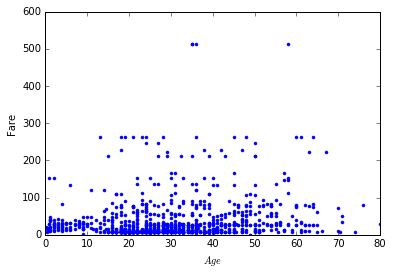

In [38]:
plt.figure()
plt.plot(x,y,'b.')
plt.xlabel("$Age$")
plt.ylabel("Fare")
plt.show()

In [39]:
reg = linear_model.LinearRegression().fit(X=x,y=y)

predictions = reg.predict(x)

In [40]:
print('Coefficients: \n', titanic_1.iloc[:,1:].columns, reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

Coefficients: 
 Index(['Age'], dtype='object') [0.692299]
Mean squared error: 3004.00


In [41]:
titanic_2= df.iloc[:,[3,4]].dropna()

dummies = pd.get_dummies(titanic_2['Pclass'], drop_first=True, prefix='class_ticket_')

titanic_2 = titanic_2.join(dummies).drop(['Pclass'], axis=1)

print(titanic_2.head())

x = titanic_2.iloc[:,1:].values

y = titanic_2.iloc[:,0].values

      Fare  class_ticket__2  class_ticket__3
0   7.2500                0                1
1  71.2833                0                0
2   7.9250                0                1
3  53.1000                0                0
4   8.0500                0                1


In [42]:
reg = linear_model.LinearRegression().fit(X=x,y=y)

predictions = reg.predict(x)

In [43]:
print('Coefficients: \n', titanic_2.iloc[:,1:].columns, reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, predictions))

Coefficients: 
 Index(['class_ticket__2', 'class_ticket__3'], dtype='object') [-66.32979525 -74.20610294]
Mean squared error: 1703.68
